<a href="https://colab.research.google.com/github/juhumkwon/Data/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D(%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 0: Loss = 155.7353, W = -0.6885, b = 0.3305
Epoch 10: Loss = 0.7042, W = 1.8019, b = 1.0178
Epoch 20: Loss = 0.0040, W = 1.9699, b = 1.0619
Epoch 30: Loss = 0.0007, W = 1.9817, b = 1.0628
Epoch 40: Loss = 0.0007, W = 1.9831, b = 1.0609
Epoch 50: Loss = 0.0006, W = 1.9837, b = 1.0589
Epoch 60: Loss = 0.0006, W = 1.9842, b = 1.0570
Epoch 70: Loss = 0.0006, W = 1.9847, b = 1.0551
Epoch 80: Loss = 0.0005, W = 1.9853, b = 1.0532
Epoch 90: Loss = 0.0005, W = 1.9857, b = 1.0515
Epoch 100: Loss = 0.0005, W = 1.9862, b = 1.0497
Epoch 110: Loss = 0.0004, W = 1.9867, b = 1.0481
Epoch 120: Loss = 0.0004, W = 1.9871, b = 1.0465
Epoch 130: Loss = 0.0004, W = 1.9876, b = 1.0449
Epoch 140: Loss = 0.0003, W = 1.9880, b = 1.0434
Epoch 150: Loss = 0.0003, W = 1.9884, b = 1.0420
Epoch 160: Loss = 0.0003, W = 1.9888, b = 1.0406
Epoch 170: Loss = 0.0003, W = 1.9891, b = 1.0392
Epoch 180: Loss = 0.0003, W = 1.9895, b = 1.0379
Epoch 190: Loss = 0.0002, W = 1.9898, b = 1.0367
Epoch 200: Loss = 0.0002, W 

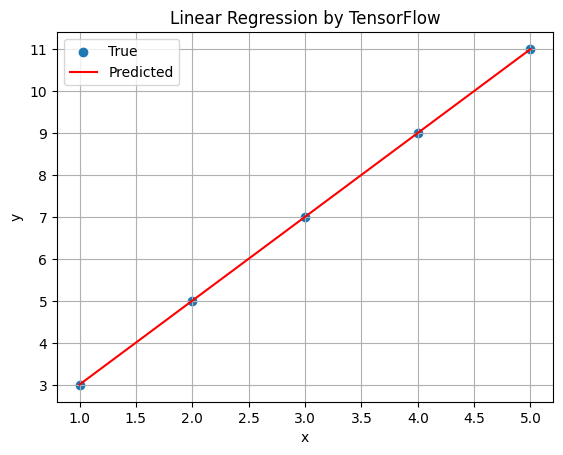

In [3]:

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 1. 훈련 데이터 생성 (y = 2x + 1)
x_train = np.array([1, 2, 3, 4, 5], dtype=np.float32)
y_train = 2 * x_train + 1

# 2. 학습 대상 변수: W와 b
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))

# 3. 선형 모델 정의
def model(x):
    return W * x + b

# 4. 손실 함수 (Mean Squared Error)
def loss_fn(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

# 5. 옵티마이저
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

# 6. 학습 루프
for epoch in range(500):
    with tf.GradientTape() as tape:
        y_pred = model(x_train)
        loss = loss_fn(y_pred, y_train)

    gradients = tape.gradient(loss, [W, b])
    optimizer.apply_gradients(zip(gradients, [W, b]))

    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {loss.numpy():.4f}, W = {W.numpy()[0]:.4f}, b = {b.numpy()[0]:.4f}")

# 7. 예측 결과 시각화
plt.scatter(x_train, y_train, label='True')
plt.plot(x_train, model(x_train), color='red', label='Predicted')
plt.legend()
plt.title("Linear Regression by TensorFlow")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()